In [2]:
import torch

x = torch.tensor([[1, 2]])
y = torch.tensor([[1],[2]])

x.shape, y.shape, x.dtype

(torch.Size([1, 2]), torch.Size([2, 1]), torch.int64)

In [3]:
x = torch.tensor([False, 1, 2.0])

x, x.dtype

(tensor([0., 1., 2.]), torch.float32)

In [4]:
torch.zeros((3, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [5]:
torch.ones((3, 4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [6]:
torch.randint(low=0, high=10, size=(3, 4))

tensor([[0, 1, 9, 9],
        [2, 4, 9, 7],
        [6, 5, 1, 4]])

In [7]:
torch.rand(3, 4)

tensor([[0.6715, 0.6944, 0.6697, 0.8315],
        [0.1915, 0.9080, 0.9042, 0.4586],
        [0.0316, 0.0068, 0.1643, 0.9775]])

In [8]:
torch.randn((3, 4))

tensor([[ 1.5604, -0.5726,  1.1685, -1.4320],
        [-0.5082,  1.3936, -0.6688, -0.0644],
        [ 0.0506, -1.0910, -1.4320,  0.6253]])

In [9]:
import numpy as np

x = np.array([[10, 20, 30, 40], [2, 3, 4, 5]])
y = torch.tensor(x)

type(x), type(y)

(numpy.ndarray, torch.Tensor)

In [10]:
y*10

tensor([[100, 200, 300, 400],
        [ 20,  30,  40,  50]], dtype=torch.int32)

In [11]:
y.add(10)

tensor([[20, 30, 40, 50],
        [12, 13, 14, 15]], dtype=torch.int32)

In [12]:
y

tensor([[10, 20, 30, 40],
        [ 2,  3,  4,  5]], dtype=torch.int32)

In [13]:
y.add_(10)

tensor([[20, 30, 40, 50],
        [12, 13, 14, 15]], dtype=torch.int32)

In [14]:
y

tensor([[20, 30, 40, 50],
        [12, 13, 14, 15]], dtype=torch.int32)

In [15]:
y = torch.tensor([2, 3, 1, 0])

print(y.shape)

y = y.view(4, 1)

y.shape

torch.Size([4])


torch.Size([4, 1])

In [16]:
x = torch.randn((10, 1, 10))

print(x.shape)

z1 = torch.squeeze(x, 1)

print(z1.shape)

torch.Size([10, 1, 10])
torch.Size([10, 10])


In [17]:
y = torch.tensor([2, 3, 1, 0]).view(4, 1)

x = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])

print(x.shape, y.shape)
print(torch.matmul(x, y))
print(x@y)

torch.Size([2, 4]) torch.Size([4, 1])
tensor([[11],
        [35]])
tensor([[11],
        [35]])


In [18]:
x = torch.randn(10, 10, 10)
z = torch.cat([x, x], axis=0)

z.shape

torch.Size([20, 10, 10])

In [19]:
x = torch.randn(2, 2, 2)
z = torch.cat([x, x], axis=1)

x, z

(tensor([[[0.9181, 0.2421],
          [0.7384, 0.2796]],
 
         [[0.5416, 1.0902],
          [1.9219, 0.0451]]]),
 tensor([[[0.9181, 0.2421],
          [0.7384, 0.2796],
          [0.9181, 0.2421],
          [0.7384, 0.2796]],
 
         [[0.5416, 1.0902],
          [1.9219, 0.0451],
          [0.5416, 1.0902],
          [1.9219, 0.0451]]]))

In [20]:
x = torch.arange(25).reshape(5, 5)

x.shape, x.max()

(torch.Size([5, 5]), tensor(24))

In [21]:
print(x.max(dim=0))

max, argmax = torch.max(x, 0)

print(max, argmax)

torch.return_types.max(
values=tensor([20, 21, 22, 23, 24]),
indices=tensor([4, 4, 4, 4, 4]))
tensor([20, 21, 22, 23, 24]) tensor([4, 4, 4, 4, 4])


In [22]:
x = torch.randn(10, 20, 30)
z = x.permute(2, 0, 1)

x.shape, z.shape

(torch.Size([10, 20, 30]), torch.Size([30, 10, 20]))

In [23]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)

x

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)

In [24]:
out = x.pow(2).sum()

out

tensor(7., grad_fn=<SumBackward0>)

In [25]:
out.backward()

In [26]:
x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

In [51]:
import torch
import torch.nn as nn
from torchsummary import summary

x = [[1, 3], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Linear(2, 8)
        self.hidden_to_activate = nn.ReLU()
        self.hidden_to_output = nn.Linear(8, 1)
    def forward(self,x):
        output = self.input_to_hidden(x)
        output = self.hidden_to_activate(output)
        output = self.hidden_to_output(output)
        
        return output
    
mynet = MyNeuralNet()

summary(mynet, (1,2))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [28]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[-0.3328,  0.1640],
        [-0.4011, -0.3209],
        [ 0.4833, -0.7042],
        [ 0.0419,  0.7048],
        [-0.0077, -0.2108],
        [ 0.1321,  0.3746],
        [-0.6896, -0.2478],
        [-0.2568,  0.2672]], requires_grad=True)
Parameter containing:
tensor([ 0.5004, -0.5876, -0.5489, -0.4790, -0.0765, -0.6551,  0.1728,  0.6942],
       requires_grad=True)
Parameter containing:
tensor([[ 0.3525,  0.1660, -0.2470, -0.0626, -0.2720,  0.3485,  0.2531, -0.0867]],
       requires_grad=True)
Parameter containing:
tensor([-0.2773], requires_grad=True)


In [29]:
mynet.input_to_hidden.weight

Parameter containing:
tensor([[-0.3328,  0.1640],
        [-0.4011, -0.3209],
        [ 0.4833, -0.7042],
        [ 0.0419,  0.7048],
        [-0.0077, -0.2108],
        [ 0.1321,  0.3746],
        [-0.6896, -0.2478],
        [-0.2568,  0.2672]], requires_grad=True)

In [52]:
loss_func = nn.MSELoss()

opt = torch.optim.SGD(mynet.parameters(), lr=0.001)

loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss = loss_func(mynet(X), Y)
    loss.backward()
    opt.step()
    loss_history.append(loss.item())


[140.52557373046875, 115.61576843261719, 96.78486633300781, 81.41232299804688, 67.77188110351562, 55.178367614746094, 43.519248962402344, 32.99932861328125, 23.936716079711914, 16.584476470947266, 11.010644912719727, 7.071033954620361, 4.468667984008789, 2.8522133827209473, 1.8999521732330322, 1.3627119064331055, 1.0695302486419678, 0.913225531578064, 0.8309601545333862, 0.787680447101593, 0.7645273804664612, 0.7516224980354309, 0.7438797354698181, 0.7387232780456543, 0.7348577976226807, 0.7316362261772156, 0.728737473487854, 0.7260029315948486, 0.7233539819717407, 0.7207515239715576, 0.7181769013404846, 0.7156209349632263, 0.7130789160728455, 0.7105478048324585, 0.708026647567749, 0.7055150270462036, 0.7030133605003357, 0.7005208730697632, 0.6980370283126831, 0.6955614686012268, 0.6930959820747375, 0.6906392574310303, 0.6881911754608154, 0.6857513189315796, 0.6833204627037048, 0.6808979511260986, 0.6784845590591431, 0.6760791540145874, 0.6736829280853271, 0.6712942719459534]


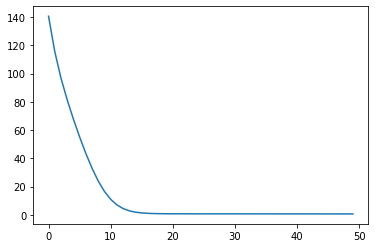

In [53]:
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
%matplotlib inline

print(loss_history)
plt.plot(range(50), loss_history)

In [54]:
mynet.state_dict()

OrderedDict([('input_to_hidden.weight',
              tensor([[ 0.4746,  0.4794],
                      [-0.0929,  0.8431],
                      [ 0.1556,  0.6041],
                      [ 0.1865,  0.3412],
                      [ 0.2112,  0.1143],
                      [-0.3007,  0.2919],
                      [ 0.5387, -0.6598],
                      [ 0.0996,  0.6085]])),
             ('input_to_hidden.bias',
              tensor([ 0.1982, -0.5879, -0.2871, -0.0127,  0.3859, -0.3573, -0.2454,  0.1750])),
             ('hidden_to_output.weight',
              tensor([[ 0.5895,  0.5450,  0.6128,  0.3919,  0.1124, -0.2193,  0.1398,  0.3264]])),
             ('hidden_to_output.bias', tensor([0.0923]))])

In [56]:
from torchvision import datasets
import torch


data_folder = './data/FMNIST'

fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

26422272it [00:09, 2684005.64it/s]                              


Extracting ./data/FMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/FMNIST\FashionMNIST\raw



29696it [00:00, 162776.81it/s]                          


Extracting ./data/FMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/FMNIST\FashionMNIST\raw



4422656it [00:10, 420378.23it/s]                              


Extracting ./data/FMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/FMNIST\FashionMNIST\raw



6144it [00:00, 6156188.19it/s]          

Extracting ./data/FMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/FMNIST\FashionMNIST\raw



In [59]:
tr_images = fmnist.data
tr_targets = fmnist.targets



unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX -{tr_images.shape}\n\tY \
-{tr_targets.shape}\n\tY-Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}')

tr_images & tr_targets:
	X -torch.Size([60000, 28, 28])
	Y -torch.Size([60000])
	Y-Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


0
1
2
3
4
5
6
7
8
9


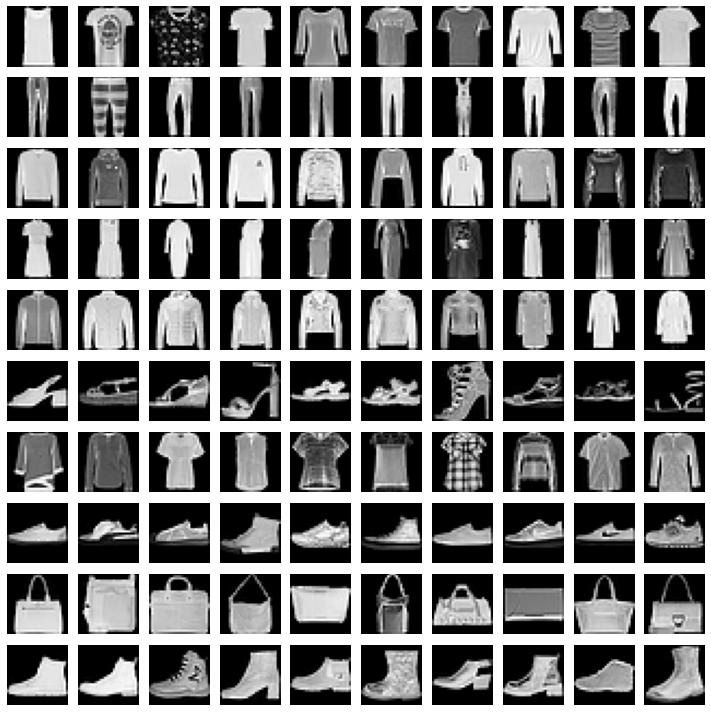

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
R, C = len(tr_targets.unique()), 10

fig, ax = plt.subplots(R, C, figsize=(10, 10))


for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False)
        plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()